In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier,StackingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
heart_df  = pd.read_csv("heart.csv")
spo2_df = pd.read_csv("o2Saturation.csv")

In [3]:
heart_df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [5]:
spo2_df.head()

98.6
0  98.6
1  98.6
2  98.6
3  98.1
4  97.5

In [6]:
heart_df.shape

(303, 14)

- Age : Age of the patient

- Sex : Sex of the patient

- exang: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)

- cp : Chest Pain type chest pain type

   - Value 1: typical angina
   
   - Value 2: atypical angina
   
   - Value 3: non-anginal pain
   
   - Value 4: asymptomatic

- trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results

    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
- thalach : maximum heart rate achieved

- target : 0= less chance of heart attack 1= more chance of heart attack

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart_df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [9]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [12]:
num_cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
                
for col in num_cat_cols:
    print("column : {}".format(col))            
    print(heart_df[col].value_counts(normalize=True))
    print("\n")            

column : sex
1    0.683168
0    0.316832
Name: sex, dtype: float64


column : cp
0    0.471947
2    0.287129
1    0.165017
3    0.075908
Name: cp, dtype: float64


column : fbs
0    0.851485
1    0.148515
Name: fbs, dtype: float64


column : restecg
1    0.501650
0    0.485149
2    0.013201
Name: restecg, dtype: float64


column : exng
0    0.673267
1    0.326733
Name: exng, dtype: float64


column : slp
2    0.468647
1    0.462046
0    0.069307
Name: slp, dtype: float64


column : caa
0    0.577558
1    0.214521
2    0.125413
3    0.066007
4    0.016502
Name: caa, dtype: float64


column : thall
2    0.547855
3    0.386139
1    0.059406
0    0.006601
Name: thall, dtype: float64




In [13]:
heart_df['age'].max(), heart_df['age'].min()

(77, 29)

In [17]:
#heart_df['age'].value_counts()

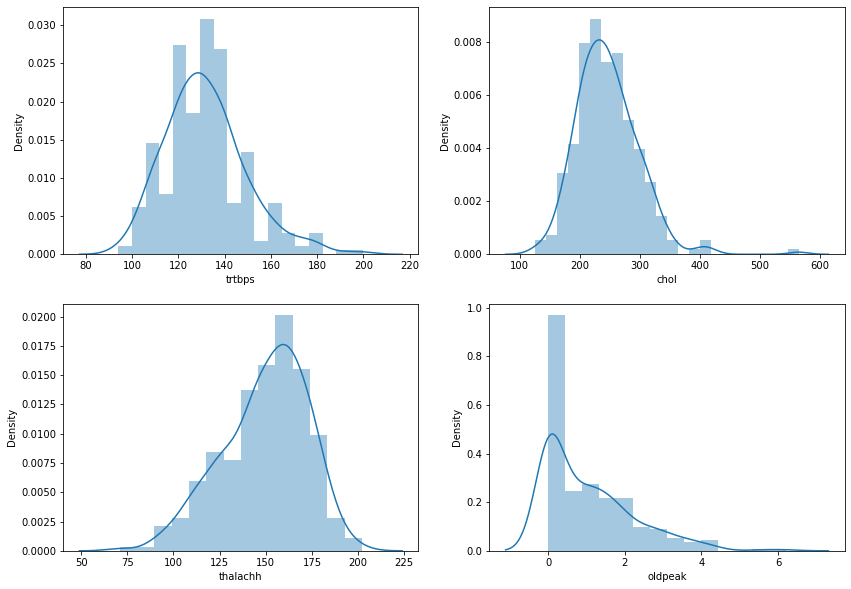

In [25]:
fig, ax = plt.subplots(2,2,figsize=(14,10))
sns.distplot(heart_df['trtbps'],ax=ax[0,0])
sns.distplot(heart_df['chol'],ax=ax[0,1])
sns.distplot(heart_df['thalachh'],ax=ax[1,0])
sns.distplot(heart_df['oldpeak'],ax=ax[1,1]);

In [28]:
heart_df.query("chol > 400")

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
28    65    0   2     140   417    1        0       157     0      0.8    2   
85    67    0   2     115   564    0        0       160     0      1.6    1   
220   63    0   0     150   407    0        0       154     0      4.0    1   
246   56    0   0     134   409    0        0       150     1      1.9    1   

     caa  thall  output  
28     1      2       1  
85     0      3       1  
220    3      3       0  
246    2      3       0

In [30]:
heart_df.query("oldpeak > 4.0")

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
101   59    1   3     178   270    0        0       145     0      4.2    0   
204   62    0   0     160   164    0        0       145     0      6.2    0   
221   55    1   0     140   217    0        1       111     1      5.6    0   
250   51    1   0     140   298    0        1       122     1      4.2    1   
291   58    1   0     114   318    0        2       140     0      4.4    0   

     caa  thall  output  
101    0      3       1  
204    3      3       0  
221    0      3       0  
250    3      3       0  
291    3      1       0

In [40]:
heart_df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [66]:
X = heart_df.drop("output",axis=1)
y = heart_df['output']

In [67]:
y.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: output, dtype: float64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [69]:
print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


In [70]:
y_train.value_counts(normalize=True)

1    0.545455
0    0.454545
Name: output, dtype: float64

In [71]:
y_test.value_counts(normalize=True)

1    0.540984
0    0.459016
Name: output, dtype: float64

In [21]:
def build_pipeline(model):
    
    pipeline = Pipeline([
                       ('scaler', StandardScaler()),
                       ('clf', model) 
                       ])
    
    return pipeline

In [22]:
def scan_model(pipeline,param_dict,X_train,y_train):
    
    grid_cv = GridSearchCV(pipeline,param_grid=param_dict,scoring='accuracy',cv=5,verbose=2)
    grid_cv.fit(X_train,y_train)

    return grid_cv

In [23]:
def eval_model(model,X_test,y_test):
    
    pred_test = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test,pred_test).ravel()
    acc_test = accuracy_score(y_test,pred_test)
    prec_test = precision_score(y_test,pred_test)
    recall_test = recall_score(y_test,pred_test)
    f1_test = f1_score(y_test,pred_test)
    
    return acc_test,f1_test,tn,fp,fn,tp

In [24]:
model_list = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(),
        GradientBoostingClassifier(), AdaBoostClassifier(), XGBClassifier()]

lr_dict = {'clf__C' : np.arange(0.1,6,0.5),
           'clf__solver': ['liblinear','lbfgs']}

dt_dict = {'clf__criterion' : ['gini', 'entropy'],
           'clf__max_features' : ['sqrt','log2'],
           'clf__max_depth' : np.arange(10,60,10)}

rf_dict = {'clf__n_estimators': np.arange(20,100,20),
           'clf__criterion' : ['gini', 'entropy'],
           'clf__max_features' : ['sqrt','log2'],
           'clf__max_depth' : np.arange(10,60,10)}

knn_dict = {'clf__n_neighbors': np.arange(5,30,5),
            'clf__weights' : ['uniform','distance'],
            'clf__algorithm' : ['auto','ball_tree','kd_tree','brute'],
            'clf__metric' : ['minkowski','euclidean']}

gb_dict = {'clf__loss' : ['deviance','exponential'],
           'clf__learning_rate': np.arange(0.1,5,0.5),
           'clf__n_estimators': np.arange(20,100,20),
           'clf__criterion' : ['friedman_mse','mse','mae'],
           'clf__max_features' : ['sqrt','log2']}

ada_dict = {
           'clf__learning_rate': np.arange(0.1,5,0.5),
           'clf__n_estimators': np.arange(20,100,20),
           'clf__algorithm' : ['SAMME','SAMME.R']}

xgb_dict = {
           'clf__learning_rate': np.arange(0.1,5,0.5),
           'clf__n_estimators': np.arange(20,100,20),
           'clf__booster':['gbtree','gblinear','dart'],
           'clf__gamma': np.arange(0.1,5,0.5)}

param_list = [lr_dict, dt_dict, rf_dict, knn_dict, gb_dict, ada_dict, xgb_dict]

In [72]:
scan_list = []
pred_list = []

for model, param_dict in zip(model_list,param_list):
    print("building model : {}\n".format(str(model).split("(")[0]))
    pipeline = build_pipeline(model)
    start_time = time.time()      
    grid_cv = scan_model(pipeline,param_dict,X_train,y_train)
    print("\n model fitted!")
    elapsed_time = time.time() - start_time        
    acc_test,f1_test,tn,fp,fn,tp = eval_model(grid_cv,X_test,y_test)   
      
    scan_list.append({
              'model': str(model).split("(")[0],
              'best_score': grid_cv.best_score_,
              'test_acc': acc_test,
              'test_f1': f1_test,
              'best_params':grid_cv.best_params_,
              'time':elapsed_time
    })      
          
          
    pred_list.append({
              'model': str(model).split("(")[0],
              'true_neg':tn,
              'false_pos':fp,
              'false_neg':fn,
              'true_pos':tp
    })      

building model : LogisticRegression

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..................clf__C=0.1, clf__solver=liblinear; total time=   0.0s
[CV] END ..................clf__C=0.1, clf__solver=liblinear; total time=   0.0s
[CV] END ..................clf__C=0.1, clf__solver=liblinear; total time=   0.0s
[CV] END ..................clf__C=0.1, clf__solver=liblinear; total time=   0.0s
[CV] END ..................clf__C=0.1, clf__solver=liblinear; total time=   0.0s
[CV] END ......................clf__C=0.1, clf__solver=lbfgs; total time=   0.0s
[CV] END ......................clf__C=0.1, clf__solver=lbfgs; total time=   0.0s
[CV] END ......................clf__C=0.1, clf__solver=lbfgs; total time=   0.0s
[CV] END ......................clf__C=0.1, clf__solver=lbfgs; total time=   0.0s
[CV] END ......................clf__C=0.1, clf__solver=lbfgs; total time=   0.0s
[CV] END ..................clf__C=0.6, clf__solver=liblinear; total time=   0.0s
[CV] END .

[CV] END clf__criterion=gini, clf__max_depth=10, clf__max_features=sqrt; total time=   0.0s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__max_features=sqrt; total time=   0.0s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__max_features=sqrt; total time=   0.0s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__max_features=log2; total time=   0.0s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__max_features=log2; total time=   0.0s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__max_features=log2; total time=   0.0s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__max_features=log2; total time=   0.0s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__max_features=log2; total time=   0.0s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__max_features=sqrt; total time=   0.0s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__max_features=sqrt; total time=   0.0s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__max_features=sqrt; total t

[CV] END clf__criterion=entropy, clf__max_depth=50, clf__max_features=sqrt; total time=   0.0s
[CV] END clf__criterion=entropy, clf__max_depth=50, clf__max_features=sqrt; total time=   0.0s
[CV] END clf__criterion=entropy, clf__max_depth=50, clf__max_features=sqrt; total time=   0.0s
[CV] END clf__criterion=entropy, clf__max_depth=50, clf__max_features=sqrt; total time=   0.0s
[CV] END clf__criterion=entropy, clf__max_depth=50, clf__max_features=log2; total time=   0.0s
[CV] END clf__criterion=entropy, clf__max_depth=50, clf__max_features=log2; total time=   0.0s
[CV] END clf__criterion=entropy, clf__max_depth=50, clf__max_features=log2; total time=   0.0s
[CV] END clf__criterion=entropy, clf__max_depth=50, clf__max_features=log2; total time=   0.0s
[CV] END clf__criterion=entropy, clf__max_depth=50, clf__max_features=log2; total time=   0.0s

 model fitted!
building model : RandomForestClassifier

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END clf__criterion=gi

[CV] END clf__criterion=gini, clf__max_depth=20, clf__max_features=log2, clf__n_estimators=40; total time=   0.1s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__max_features=log2, clf__n_estimators=40; total time=   0.1s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__max_features=log2, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__max_features=log2, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__max_features=log2, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__max_features=log2, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__max_features=log2, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__max_features=log2, clf__n_estimato

[CV] END clf__criterion=gini, clf__max_depth=40, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__max_features=log2, clf__n_estimators=40; total time=   0.1s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__max_features=log2, clf__n_estimators=40; total time=   0.1s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__max_features=log2, clf__n_estimators=40; total time=   0.1s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__max_features=log2, clf__n_estimators=40; total time=   0.1s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__max_features=log2, clf__n_estimators=40; total time=   0.1s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__max_features=log2, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__max_features=log2, clf__n_estimato

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__max_fea

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.1s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.1s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__max_fea

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=entropy, clf__max_depth=50, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=entropy, clf__max_depth=50, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=entropy, clf__max_depth=50, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=entropy, clf__max_depth=50, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=entropy, clf__max_depth=50, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=entropy, clf__max_depth=50, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.1s
[CV] END clf__criterion=entropy, clf__max_depth=50, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.1s
[CV] END clf__criterion=entropy, clf__max_depth=50, clf__max_fea

[CV] END clf__algorithm=auto, clf__metric=euclidean, clf__n_neighbors=5, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=auto, clf__metric=euclidean, clf__n_neighbors=5, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=auto, clf__metric=euclidean, clf__n_neighbors=5, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=auto, clf__metric=euclidean, clf__n_neighbors=5, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=auto, clf__metric=euclidean, clf__n_neighbors=5, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=auto, clf__metric=euclidean, clf__n_neighbors=5, clf__weights=distance; total time=   0.0s
[CV] END clf__algorithm=auto, clf__metric=euclidean, clf__n_neighbors=5, clf__weights=distance; total time=   0.0s
[CV] END clf__algorithm=auto, clf__metric=euclidean, clf__n_neighbors=5, clf__weights=distance; total time=   0.0s
[CV] END clf__algorithm=auto, clf__metric=euclidean, clf__n_neighbors=5, clf__weights

[CV] END clf__algorithm=ball_tree, clf__metric=minkowski, clf__n_neighbors=15, clf__weights=distance; total time=   0.0s
[CV] END clf__algorithm=ball_tree, clf__metric=minkowski, clf__n_neighbors=15, clf__weights=distance; total time=   0.0s
[CV] END clf__algorithm=ball_tree, clf__metric=minkowski, clf__n_neighbors=20, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=ball_tree, clf__metric=minkowski, clf__n_neighbors=20, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=ball_tree, clf__metric=minkowski, clf__n_neighbors=20, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=ball_tree, clf__metric=minkowski, clf__n_neighbors=20, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=ball_tree, clf__metric=minkowski, clf__n_neighbors=20, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=ball_tree, clf__metric=minkowski, clf__n_neighbors=20, clf__weights=distance; total time=   0.0s
[CV] END clf__algorithm=ball_tree, cl

[CV] END clf__algorithm=kd_tree, clf__metric=minkowski, clf__n_neighbors=5, clf__weights=distance; total time=   0.0s
[CV] END clf__algorithm=kd_tree, clf__metric=minkowski, clf__n_neighbors=5, clf__weights=distance; total time=   0.0s
[CV] END clf__algorithm=kd_tree, clf__metric=minkowski, clf__n_neighbors=5, clf__weights=distance; total time=   0.0s
[CV] END clf__algorithm=kd_tree, clf__metric=minkowski, clf__n_neighbors=10, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=kd_tree, clf__metric=minkowski, clf__n_neighbors=10, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=kd_tree, clf__metric=minkowski, clf__n_neighbors=10, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=kd_tree, clf__metric=minkowski, clf__n_neighbors=10, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=kd_tree, clf__metric=minkowski, clf__n_neighbors=10, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=kd_tree, clf__metric=minkowski, 

[CV] END clf__algorithm=kd_tree, clf__metric=euclidean, clf__n_neighbors=20, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=kd_tree, clf__metric=euclidean, clf__n_neighbors=20, clf__weights=distance; total time=   0.0s
[CV] END clf__algorithm=kd_tree, clf__metric=euclidean, clf__n_neighbors=20, clf__weights=distance; total time=   0.0s
[CV] END clf__algorithm=kd_tree, clf__metric=euclidean, clf__n_neighbors=20, clf__weights=distance; total time=   0.0s
[CV] END clf__algorithm=kd_tree, clf__metric=euclidean, clf__n_neighbors=20, clf__weights=distance; total time=   0.0s
[CV] END clf__algorithm=kd_tree, clf__metric=euclidean, clf__n_neighbors=20, clf__weights=distance; total time=   0.0s
[CV] END clf__algorithm=kd_tree, clf__metric=euclidean, clf__n_neighbors=25, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=kd_tree, clf__metric=euclidean, clf__n_neighbors=25, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=kd_tree, clf__metric=euclid

[CV] END clf__algorithm=brute, clf__metric=euclidean, clf__n_neighbors=10, clf__weights=distance; total time=   0.0s
[CV] END clf__algorithm=brute, clf__metric=euclidean, clf__n_neighbors=10, clf__weights=distance; total time=   0.0s
[CV] END clf__algorithm=brute, clf__metric=euclidean, clf__n_neighbors=10, clf__weights=distance; total time=   0.0s
[CV] END clf__algorithm=brute, clf__metric=euclidean, clf__n_neighbors=10, clf__weights=distance; total time=   0.0s
[CV] END clf__algorithm=brute, clf__metric=euclidean, clf__n_neighbors=15, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=brute, clf__metric=euclidean, clf__n_neighbors=15, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=brute, clf__metric=euclidean, clf__n_neighbors=15, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=brute, clf__metric=euclidean, clf__n_neighbors=15, clf__weights=uniform; total time=   0.0s
[CV] END clf__algorithm=brute, clf__metric=euclidean, clf__n_neighbo

[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_es

[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.6, clf__loss=deviance, clf__max_features=log2, clf__n_estim

[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=0.6, clf__loss=exponential, clf__max_featur

[CV] END clf__criterion=friedman_mse, clf__learning_rate=1.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=1.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=1.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=1.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=1.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=1.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=1.1, clf__loss=exponential, clf__max_featur

[CV] END clf__criterion=friedman_mse, clf__learning_rate=1.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=1.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=1.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=1.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=1.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=1.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=1.6, clf__loss=deviance, clf__max_features=log2, clf__n_estim

[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estim

[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.1, clf__loss=exponential, clf__max_featur

[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=2.6, clf__loss=exponential, clf__max_featur

[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.1, clf__loss=deviance, clf__max_features=log2, clf__n_estim

[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estim

[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=3.6, clf__loss=exponential, clf__max_featur

[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.1, clf__loss=exponential, clf__max_features=sqrt, clf

[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estim

[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=friedman_mse, clf__learning_rate=4.6, clf__loss=exponential, clf__max_featur

[CV] END clf__criterion=mse, clf__learning_rate=0.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mse, clf__learning_rate=0.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=0.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=0.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=0.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mse, clf__learning_rate=0.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=0.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf_

[CV] END clf__criterion=mse, clf__learning_rate=0.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=0.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=0.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=0.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=0.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=0.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=0.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse,

[CV] END clf__criterion=mse, clf__learning_rate=1.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=1.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=1.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=1.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=1.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=1.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=1.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__

[CV] END clf__criterion=mse, clf__learning_rate=1.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=1.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=1.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=1.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=1.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=1.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=1.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=m

[CV] END clf__criterion=mse, clf__learning_rate=1.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=1.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=1.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=1.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=1.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=1.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=1.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=40; total time=   0.0s
[CV] END clf_

[CV] END clf__criterion=mse, clf__learning_rate=2.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=2.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=2.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=2.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=2.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=2.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=2.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.0s
[CV] END clf_

[CV] END clf__criterion=mse, clf__learning_rate=2.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=2.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=2.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=2.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=2.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=2.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=2.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__

[CV] END clf__criterion=mse, clf__learning_rate=3.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=3.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=3.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=3.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=3.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=3.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=3.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mse, clf__

[CV] END clf__criterion=mse, clf__learning_rate=3.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=3.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=3.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=3.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=3.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=3.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=3.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf_

[CV] END clf__criterion=mse, clf__learning_rate=3.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=40; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=3.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=3.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=3.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=3.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=3.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=3.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.0s
[CV] END clf_

[CV] END clf__criterion=mse, clf__learning_rate=4.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=mse, clf__learning_rate=4.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=60; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=4.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mse, clf__learning_rate=4.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mse, clf__learning_rate=4.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=4.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=4.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__

[CV] END clf__criterion=mse, clf__learning_rate=4.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=mse, clf__learning_rate=4.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mse, clf__learning_rate=4.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mse, clf__learning_rate=4.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mse, clf__learning_rate=4.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mse, clf__learning_rate=4.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mse, clf__learning_rate=4.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mse, clf__

[CV] END clf__criterion=mse, clf__learning_rate=4.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=4.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=4.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=4.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mse, clf__learning_rate=4.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.0s
[CV] END clf__criterion=mae, clf__learning_rate=0.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mae, clf__learning_rate=0.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__crite

[CV] END clf__criterion=mae, clf__learning_rate=0.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=0.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=0.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=0.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=0.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=0.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mae, clf__learning_rate=0.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf_

[CV] END clf__criterion=mae, clf__learning_rate=0.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=0.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=0.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=0.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=0.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mae, clf__learning_rate=0.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mae, clf__learning_rate=0.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=m

[CV] END clf__criterion=mae, clf__learning_rate=1.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=1.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=1.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=1.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mae, clf__learning_rate=1.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mae, clf__learning_rate=1.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mae, clf__learning_rate=1.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mae, clf__

[CV] END clf__criterion=mae, clf__learning_rate=1.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=1.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=1.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=1.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=1.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mae, clf__learning_rate=1.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mae, clf__learning_rate=1.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterio

[CV] END clf__criterion=mae, clf__learning_rate=1.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=1.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=1.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=1.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=1.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mae, clf__learning_rate=1.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mae, clf__learning_rate=1.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf_

[CV] END clf__criterion=mae, clf__learning_rate=2.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=2.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=2.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=2.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=2.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mae, clf__learning_rate=2.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mae, clf__learning_rate=2.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=m

[CV] END clf__criterion=mae, clf__learning_rate=2.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=2.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=2.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=2.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=2.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=2.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mae, clf__learning_rate=2.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mae, clf__

[CV] END clf__criterion=mae, clf__learning_rate=2.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=2.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=2.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=2.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=2.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=2.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=3.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__cr

[CV] END clf__criterion=mae, clf__learning_rate=3.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=3.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=3.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=3.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=3.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=3.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=3.1, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf_

[CV] END clf__criterion=mae, clf__learning_rate=3.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=3.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=3.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=3.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=3.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=3.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=3.6, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__

[CV] END clf__criterion=mae, clf__learning_rate=4.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=4.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=4.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=4.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=4.1, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=4.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mae, clf__learning_rate=4.1, clf__loss=deviance, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf__criterion=mae, clf__

[CV] END clf__criterion=mae, clf__learning_rate=4.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=4.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=4.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=4.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=4.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=4.1, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=4.6, clf__loss=deviance, clf__max_features=sqrt, clf__n_estimators=20; total time=   0.0s
[CV] END clf__cr

[CV] END clf__criterion=mae, clf__learning_rate=4.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=60; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=4.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=4.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=4.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=4.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=4.6, clf__loss=exponential, clf__max_features=sqrt, clf__n_estimators=80; total time=   0.1s
[CV] END clf__criterion=mae, clf__learning_rate=4.6, clf__loss=exponential, clf__max_features=log2, clf__n_estimators=20; total time=   0.0s
[CV] END clf_

[CV] END clf__algorithm=SAMME, clf__learning_rate=1.1, clf__n_estimators=40; total time=   0.1s
[CV] END clf__algorithm=SAMME, clf__learning_rate=1.1, clf__n_estimators=40; total time=   0.0s
[CV] END clf__algorithm=SAMME, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.1s
[CV] END clf__algorithm=SAMME, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.1s
[CV] END clf__algorithm=SAMME, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.1s
[CV] END clf__algorithm=SAMME, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.1s
[CV] END clf__algorithm=SAMME, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.1s
[CV] END clf__algorithm=SAMME, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.1s
[CV] END clf__algorithm=SAMME, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.1s
[CV] END clf__algorithm=SAMME, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.1s
[CV] END clf__algorithm=SAMME, clf__lear

[CV] END clf__algorithm=SAMME, clf__learning_rate=3.1, clf__n_estimators=80; total time=   0.0s
[CV] END clf__algorithm=SAMME, clf__learning_rate=3.1, clf__n_estimators=80; total time=   0.0s
[CV] END clf__algorithm=SAMME, clf__learning_rate=3.1, clf__n_estimators=80; total time=   0.0s
[CV] END clf__algorithm=SAMME, clf__learning_rate=3.1, clf__n_estimators=80; total time=   0.0s
[CV] END clf__algorithm=SAMME, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[CV] END clf__algorithm=SAMME, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[CV] END clf__algorithm=SAMME, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[CV] END clf__algorithm=SAMME, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[CV] END clf__algorithm=SAMME, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[CV] END clf__algorithm=SAMME, clf__learning_rate=3.6, clf__n_estimators=40; total time=   0.0s
[CV] END clf__algorithm=SAMME, clf__lear

[CV] END clf__algorithm=SAMME.R, clf__learning_rate=0.6, clf__n_estimators=20; total time=   0.0s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=0.6, clf__n_estimators=20; total time=   0.0s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=0.6, clf__n_estimators=20; total time=   0.0s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=0.6, clf__n_estimators=60; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=0.6, clf__n_estimators=60; total time=   0.1s
[CV] END clf__algori

[CV] END clf__algorithm=SAMME.R, clf__learning_rate=2.6, clf__n_estimators=40; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=2.6, clf__n_estimators=40; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=2.6, clf__n_estimators=60; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=2.6, clf__n_estimators=60; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=2.6, clf__n_estimators=60; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=2.6, clf__n_estimators=60; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=2.6, clf__n_estimators=60; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.1s
[CV] END clf__algori

[CV] END clf__algorithm=SAMME.R, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.1s
[CV] END clf__algorithm=SAMME.R, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.1s

 model fitted!
building model : XGBClassifier

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
[17:58:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restor

[17:58:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.0s
[17:58:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.0s
[17:58:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[17:58:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.0s
[17:58:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[17:58:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[17:58:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[17:58:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[17:58:12] WARNING: /home/con

[17:58:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=2.6, clf__n_estimators=20; total time=   0.0s
[17:58:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=2.6, clf__n_estimators=20; total time=   0.0s
[17:58:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=3.1, clf__n_estimators=20; total time=   0.0s
[17:58:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=3.1, clf__n_estimators=20; total time=   0.0s
[17:58:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=3.1, clf__n_estimators=20; total time=   0.0s
[17:58:13] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=3.6, clf__n_estimators=40; total time=   0.0s
[17:58:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=3.6, clf__n_estimators=40; total time=   0.0s
[17:58:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=3.6, clf__n_estimators=40; total time=   0.0s
[17:58:13] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.0s
[17:58:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.0s
[17:58:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[17:58:14] WARNING: /home/con

[17:58:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[17:58:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.1, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[17:58:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[17:58:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[17:58:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=0.1, clf__n_estimators=80; total time=   0.0s
[17:58:15] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:58:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:58:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:58:16] WARNING: /home/con

[17:58:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=1.6, clf__n_estimators=20; total time=   0.0s
[17:58:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=1.6, clf__n_estimators=20; total time=   0.0s
[17:58:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[17:58:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=2.1, clf__n_estimators=40; total time=   0.0s
[17:58:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.0s
[17:58:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=2.6, clf__n_estimators=40; total time=   0.0s
[17:58:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=2.6, clf__n_estimators=40; total time=   0.0s
[17:58:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=2.6, clf__n_estimators=60; total time=   0.0s
[17:58:17] WARNING: /home/con

[17:58:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=3.1, clf__n_estimators=40; total time=   0.0s
[17:58:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=3.1, clf__n_estimators=60; total time=   0.0s
[17:58:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=3.6, clf__n_estimators=60; total time=   0.0s
[17:58:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=3.6, clf__n_estimators=60; total time=   0.0s
[17:58:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=3.6, clf__n_estimators=60; total time=   0.0s
[17:58:18] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[17:58:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[17:58:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[17:58:18] WARNING: /home/con

[17:58:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.0s
[17:58:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=0.6, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.0s
[17:58:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=0.1, clf__n_estimators=80; total time=   0.0s
[17:58:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=0.1, clf__n_estimators=80; total time=   0.0s
[17:58:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=0.1, clf__n_estimators=80; total time=   0.0s
[17:58:19] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:58:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:58:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.1s
[17:58:20] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[17:58:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.1s
[17:58:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[17:58:21] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[17:58:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[17:58:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[17:58:21] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.1s
[17:58:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[17:58:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[17:58:22] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=3.1, clf__n_estimators=40; total time=   0.0s
[17:58:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=3.1, clf__n_estimators=40; total time=   0.0s
[17:58:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=3.1, clf__n_estimators=40; total time=   0.0s
[17:58:23] WARNING: /home/con

[17:58:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=3.6, clf__n_estimators=60; total time=   0.0s
[17:58:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=3.6, clf__n_estimators=60; total time=   0.0s
[17:58:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[17:58:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=4.1, clf__n_estimators=80; total time=   0.0s
[17:58:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.1, clf__learning_rate=4.1, clf__n_estimators=80; total time=   0.0s
[17:58:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=0.1, clf__n_estimators=20; total time=   0.0s
[17:58:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=0.1, clf__n_estimators=20; total time=   0.0s
[17:58:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=0.1, clf__n_estimators=20; total time=   0.0s
[17:58:25] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.0s
[17:58:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.0s
[17:58:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.0s
[17:58:26] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=1.1, clf__n_estimators=40; total time=   0.0s
[17:58:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=1.1, clf__n_estimators=40; total time=   0.0s
[17:58:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=1.1, clf__n_estimators=40; total time=   0.0s
[17:58:27] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=1.6, clf__n_estimators=40; total time=   0.0s
[17:58:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=1.6, clf__n_estimators=40; total time=   0.0s
[17:58:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=1.6, clf__n_estimators=40; total time=   0.0s
[17:58:28] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.0s
[17:58:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.0s
[17:58:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.0s
[17:58:29] WARNING: /home/con

[17:58:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.1s
[17:58:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[17:58:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[17:58:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[17:58:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[17:58:30] WARNING: /home/con

[17:58:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=4.1, clf__n_estimators=20; total time=   0.0s
[17:58:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.0s
[17:58:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[17:58:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=4.6, clf__n_estimators=40; total time=   0.0s
[17:58:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=1.6, clf__learning_rate=4.6, clf__n_estimators=40; total time=   0.0s
[17:58:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=0.1, clf__n_estimators=40; total time=   0.0s
[17:58:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[17:58:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[17:58:32] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=0.6, clf__n_estimators=60; total time=   0.1s
[17:58:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:58:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:58:33] WARNING: /home/con

[17:58:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[17:58:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[17:58:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[17:58:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[17:58:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[17:58:34] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[17:58:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[17:58:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[17:58:35] WARNING: /home/con

[17:58:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[17:58:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=3.1, clf__n_estimators=20; total time=   0.0s
[17:58:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[17:58:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[17:58:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[17:58:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.0s
[17:58:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.1s
[17:58:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.0s
[17:58:37] WARNING: /home/con

[17:58:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=4.6, clf__n_estimators=40; total time=   0.0s
[17:58:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.1, clf__learning_rate=4.6, clf__n_estimators=40; total time=   0.0s
[17:58:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[17:58:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=0.1, clf__n_estimators=40; total time=   0.0s
[17:58:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=0.1, clf__n_estimators=40; total time=   0.0s
[17:58:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.1s
[17:58:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=0.6, clf__n_estimators=60; total time=   0.0s
[17:58:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=0.6, clf__n_estimators=60; total time=   0.0s
[17:58:39] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.1s
[17:58:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.1s
[17:58:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.0s
[17:58:41] WARNING: /home/con

[17:58:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.1s
[17:58:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.1s
[17:58:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.1s
[17:58:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[17:58:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[17:58:42] WARNING: /home/con

[17:58:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.1s
[17:58:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[17:58:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[17:58:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=3.6, clf__n_estimators=40; total time=   0.0s
[17:58:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=3.6, clf__n_estimators=40; total time=   0.0s
[17:58:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.0s
[17:58:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.0s
[17:58:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.0s
[17:58:44] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[17:58:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[17:58:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=2.6, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.0s
[17:58:45] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.1s
[17:58:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[17:58:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=0.1, clf__n_estimators=80; total time=   0.1s
[17:58:45] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.1s
[17:58:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.1s
[17:58:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.1s
[17:58:47] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[17:58:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[17:58:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[17:58:48] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[17:58:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[17:58:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[17:58:48] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[17:58:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=2.6, clf__n_estimators=20; total time=   0.0s
[17:58:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=2.6, clf__n_estimators=20; total time=   0.0s
[17:58:49] WARNING: /home/con

[17:58:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=3.1, clf__n_estimators=40; total time=   0.0s
[17:58:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=3.1, clf__n_estimators=40; total time=   0.0s
[17:58:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[17:58:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=3.6, clf__n_estimators=60; total time=   0.0s
[17:58:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=3.6, clf__n_estimators=60; total time=   0.0s
[17:58:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[17:58:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[17:58:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[17:58:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[17:58:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[17:58:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.1, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[17:58:51] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[17:58:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[17:58:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=0.1, clf__n_estimators=80; total time=   0.0s
[17:58:52] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:58:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:58:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:58:53] WARNING: /home/con

[17:58:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=1.6, clf__n_estimators=20; total time=   0.0s
[17:58:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=1.6, clf__n_estimators=20; total time=   0.0s
[17:58:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[17:58:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=2.1, clf__n_estimators=20; total time=   0.0s
[17:58:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=2.1, clf__n_estimators=20; total time=   0.0s
[17:58:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=2.6, clf__n_estimators=40; total time=   0.0s
[17:58:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=2.6, clf__n_estimators=40; total time=   0.0s
[17:58:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=2.6, clf__n_estimators=40; total time=   0.0s
[17:58:55] WARNING: /home/con

[17:58:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=3.1, clf__n_estimators=80; total time=   0.0s
[17:58:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=3.1, clf__n_estimators=80; total time=   0.0s
[17:58:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[17:58:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=3.6, clf__n_estimators=80; total time=   0.0s
[17:58:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=4.1, clf__n_estimators=20; total time=   0.0s
[17:58:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=4.1, clf__n_estimators=80; total time=   0.0s
[17:58:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=4.6, clf__n_estimators=20; total time=   0.0s
[17:58:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=4.6, clf__n_estimators=20; total time=   0.0s
[17:58:57] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=3.6, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.1s
[17:58:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=0.1, clf__n_estimators=20; total time=   0.0s
[17:58:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=0.1, clf__n_estimators=20; total time=   0.0s
[17:58:58] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.0s
[17:58:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.0s
[17:58:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.0s
[17:58:58] WARNING: /home/con

[17:58:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.0s
[17:58:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.0s
[17:58:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[17:59:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[17:59:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[17:59:00] WARNING: /home/con

[17:59:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.0s
[17:59:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[17:59:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[17:59:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[17:59:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=3.1, clf__n_estimators=20; total time=   0.0s
[17:59:01] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=3.1, clf__n_estimators=80; total time=   0.1s
[17:59:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=3.1, clf__n_estimators=80; total time=   0.1s
[17:59:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[17:59:03] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=3.6, clf__n_estimators=80; total time=   0.1s
[17:59:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=4.1, clf__n_estimators=20; total time=   0.0s
[17:59:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=4.1, clf__n_estimators=20; total time=   0.1s
[17:59:04] WARNING: /home/con

[17:59:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=4.6, clf__n_estimators=40; total time=   0.0s
[17:59:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.1, clf__learning_rate=4.6, clf__n_estimators=40; total time=   0.0s
[17:59:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=0.1, clf__n_estimators=20; total time=   0.2s
[17:59:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=0.1, clf__n_estimators=40; total time=   0.4s
[17:59:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=0.1, clf__n_estimators=40; total time=   0.0s
[17:59:06] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.0s
[17:59:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.0s
[17:59:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.0s
[17:59:07] WARNING: /home/con

[17:59:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.1s
[17:59:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.0s
[17:59:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[17:59:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=1.6, clf__n_estimators=40; total time=   0.0s
[17:59:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[17:59:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.1s
[17:59:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.1s
[17:59:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.1s
[17:59:10] WARNING: /home/con

[17:59:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=2.6, clf__n_estimators=60; total time=   0.0s
[17:59:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=2.6, clf__n_estimators=60; total time=   0.0s
[17:59:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=3.1, clf__n_estimators=80; total time=   0.0s
[17:59:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=3.1, clf__n_estimators=80; total time=   0.0s
[17:59:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=3.1, clf__n_estimators=80; total time=   0.0s
[17:59:11] WARNING: /home/con

[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=4.1, clf__n_estimators=20; total time=   0.0s
[17:59:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=4.1, clf__n_estimators=20; total time=   0.0s
[17:59:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=4.1, clf__n_estimators=20; total time=   0.0s
[17:59:12] WARNING: /home/con

[17:59:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[17:59:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gbtree, clf__gamma=4.6, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[17:59:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[17:59:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[17:59:13] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.0s
[17:59:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.0s
[17:59:13] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:59:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=1.1, clf__n_estimators=40; total time=   0.1s
[17:59:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=1.1, clf__n_estimators=40; total time=   0.0s
[17:59:14] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.1s
[17:59:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.1s
[17:59:14] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[17:59:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.0s
[17:59:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.0s
[17:59:15] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=2.6, clf__n_estimators=20; total time=   0.0s
[17:59:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=2.6, clf__n_estimators=20; total time=   0.0s
[17:59:15] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[17:59:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=3.1, clf__n_estimators=60; total time=   0.0s
[17:59:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=3.1, clf__n_estimators=60; total time=   0.0s
[17:59:15] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[17:59:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[17:59:15] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=3.6, clf__n_estimators=80; total time=   0.0s
[17:59:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[17:59:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=4.6, clf__n_estimators=20; total time=   0.0s
[17:59:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=4.6, clf__n_estimators=20; total time=   0.0s
[17:59:16] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.1, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.0s
[17:59:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[17:59:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=0.6, clf__n_estimators=20; total time=   0.0s
[17:59:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:59:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:59:17] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.0s
[17:59:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.0s
[17:59:17] WARNING: /home/conda/feedstock_root/build_artifacts/


[17:59:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=1.6, clf__n_estimators=20; total time=   0.0s
[17:59:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wi

[17:59:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[17:59:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=2.1, clf__n_estimators=40; total time=   0.0s
[17:59:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.0s
[17:59:18] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=2.6, clf__n_estimators=20; total time=   0.0s
[17:59:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=2.6, clf__n_estimators=20; total time=   0.0s
[17:59:18] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[17:59:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=3.1, clf__n_estimators=40; total time=   0.0s
[17:59:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=3.1, clf__n_estimators=60; total time=   0.0s
[17:59:18] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[17:59:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[17:59:19] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=3.6, clf__n_estimators=80; total time=   0.0s
[17:59:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[17:59:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=4.6, clf__n_estimators=20; total time=   0.0s
[17:59:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.0s
[17:59:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=0.6, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.0s
[17:59:19] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=0.1, clf__n_estimators=40; total time=   0.0s
[17:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=0.1, clf__n_estimators=80; total time=   0.0s
[17:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=0.6, clf__n_estimators=20; total time=   0.0s
[17:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=0.6, clf__n_estimators=60; total time=   0.0s
[17:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=0.6, clf__n_estimators=60; total time=   0.0s
[17:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=1.1, clf__n_estimators=40; total time=   0.0s
[17:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=1.6, clf__n_estimators=20; total time=   0.0s
[17:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[17:59:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=2.1, clf__n_estimators=40; total time=   0.0s
[17:59:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=2.1, clf__n_estimators=40; total time=   0.0s
[17:59:21] WARNING: /home/conda/feedstock_root/build_artifacts/


[17:59:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=2.6, clf__n_estimators=20; total time=   0.0s
[17:59:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wi

[17:59:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=2.6, clf__n_estimators=60; total time=   0.0s
[17:59:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wit

[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=3.1, clf__n_estimators=40; total time=   0.0s
[17:59:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=3.1, clf__n_estimators=40; total time=   0.0s
[17:59:21] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=3.1, clf__n_estimators=80; total time=   0.0s
[17:59:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[17:59:22] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=3.6, clf__n_estimators=60; total time=   0.0s
[17:59:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.0s
[17:59:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=4.6, clf__n_estimators=20; total time=   0.0s
[17:59:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.1, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.0s
[17:59:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[17:59:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=0.6, clf__n_estimators=20; total time=   0.0s
[17:59:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:59:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.0s
[17:59:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.0s
[17:59:24] WARNING: /home/conda/feedstock_root/build_artifacts/


[17:59:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=1.6, clf__n_estimators=20; total time=   0.0s
[17:59:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wi

[17:59:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[17:59:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=2.1, clf__n_estimators=40; total time=   0.0s
[17:59:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.0s
[17:59:24] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=2.6, clf__n_estimators=20; total time=   0.0s
[17:59:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[17:59:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[17:59:25] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=3.1, clf__n_estimators=40; total time=   0.0s
[17:59:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[17:59:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=3.6, clf__n_estimators=80; total time=   0.0s
[17:59:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.0s
[17:59:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.0s
[17:59:26] WARNING: /home/conda/feedstock_root/build_artifacts/


[17:59:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=4.6, clf__n_estimators=20; total time=   0.0s
[17:59:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wi

[17:59:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=1.6, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.0s
[17:59:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=0.1, clf__n_estimators=40; total time=   0.0s
[17:59:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=0.6, clf__n_estimators=20; total time=   0.0s
[17:59:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:59:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:59:27] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=1.1, clf__n_estimators=40; total time=   0.0s
[17:59:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=1.6, clf__n_estimators=20; total time=   0.0s
[17:59:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[17:59:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[17:59:27] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=2.1, clf__n_estimators=40; total time=   0.0s
[17:59:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur


[17:59:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=2.6, clf__n_estimators=20; total time=   0.0s
[17:59:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wi

[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[17:59:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[17:59:28] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=3.1, clf__n_estimators=40; total time=   0.0s
[17:59:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[17:59:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=3.6, clf__n_estimators=60; total time=   0.0s
[17:59:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=3.6, clf__n_estimators=80; total time=   0.0s
[17:59:29] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.0s
[17:59:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.0s
[17:59:29] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=4.1, clf__n_estimators=80; total time=   0.0s
[17:59:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur


[17:59:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.1, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[17:59:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wi


[17:59:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=0.1, clf__n_estimators=20; total time=   0.0s
[17:59:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wi

[17:59:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[17:59:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.1s
[17:59:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wit

[17:59:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.1s
[17:59:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wit

[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.0s
[17:59:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.0s
[17:59:31] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[17:59:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[17:59:32] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=2.1, clf__n_estimators=20; total time=   0.0s
[17:59:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[17:59:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=2.6, clf__n_estimators=40; total time=   0.0s
[17:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=2.6, clf__n_estimators=60; total time=   0.0s
[17:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=3.1, clf__n_estimators=20; total time=   0.0s
[17:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=3.1, clf__n_estimators=60; total time=   0.0s
[17:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=3.6, clf__n_estimators=40; total time=   0.0s
[17:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=3.6, clf__n_estimators=80; total time=   0.0s
[17:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=4.1, clf__n_estimators=20; total time=   0.0s
[17:59:33] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[17:59:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[17:59:34] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=4.6, clf__n_estimators=40; total time=   0.0s
[17:59:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=4.6, clf__n_estimators=40; total time=   0.0s
[17:59:34] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=2.6, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.0s
[17:59:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[17:59:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=0.6, clf__n_estimators=20; total time=   0.0s
[17:59:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=0.6, clf__n_estimators=20; total time=   0.0s
[17:59:34] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:59:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=1.1, clf__n_estimators=40; total time=   0.0s
[17:59:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[17:59:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.1s
[17:59:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[17:59:35] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=2.1, clf__n_estimators=40; total time=   0.0s
[17:59:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=2.1, clf__n_estimators=40; total time=   0.0s
[17:59:35] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[17:59:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=2.6, clf__n_estimators=60; total time=   0.0s
[17:59:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=3.1, clf__n_estimators=20; total time=   0.0s
[17:59:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=3.1, clf__n_estimators=80; total time=   0.0s
[17:59:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=3.6, clf__n_estimators=60; total time=   0.0s
[17:59:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=3.6, clf__n_estimators=60; total time=   0.0s
[17:59:37] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=4.1, clf__n_estimators=20; total time=   0.0s
[17:59:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[17:59:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.1, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[17:59:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=0.1, clf__n_estimators=40; total time=   0.0s
[17:59:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=0.1, clf__n_estimators=40; total time=   0.0s
[17:59:38] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=0.1, clf__n_estimators=80; total time=   0.0s
[17:59:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=0.6, clf__n_estimators=60; total time=   0.0s
[17:59:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=0.6, clf__n_estimators=60; total time=   0.0s
[17:59:38] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=1.1, clf__n_estimators=20; total time=   0.0s
[17:59:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[17:59:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[17:59:38] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=1.6, clf__n_estimators=40; total time=   0.0s
[17:59:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=2.1, clf__n_estimators=20; total time=   0.0s
[17:59:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.0s
[17:59:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.0s
[17:59:39] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=2.6, clf__n_estimators=40; total time=   0.0s
[17:59:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[17:59:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[17:59:39] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=3.1, clf__n_estimators=80; total time=   0.0s
[17:59:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=3.6, clf__n_estimators=60; total time=   0.0s
[17:59:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=4.1, clf__n_estimators=20; total time=   0.0s
[17:59:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur


[17:59:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[17:59:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wi

[17:59:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=4.6, clf__n_estimators=40; total time=   0.0s
[17:59:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=3.6, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.0s
[17:59:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=0.1, clf__n_estimators=40; total time=   0.0s
[17:59:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[17:59:41] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=0.6, clf__n_estimators=20; total time=   0.0s
[17:59:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=0.6, clf__n_estimators=20; total time=   0.0s
[17:59:41] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=1.1, clf__n_estimators=20; total time=   0.0s
[17:59:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.0s
[17:59:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[17:59:42] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=1.6, clf__n_estimators=40; total time=   0.0s
[17:59:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=2.1, clf__n_estimators=20; total time=   0.0s
[17:59:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.0s
[17:59:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[17:59:43] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=2.6, clf__n_estimators=40; total time=   0.0s
[17:59:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[17:59:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur


[17:59:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=3.1, clf__n_estimators=60; total time=   0.0s
[17:59:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wi

[17:59:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=3.6, clf__n_estimators=60; total time=   0.0s
[17:59:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.0s
[17:59:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.0s
[17:59:44] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=4.6, clf__n_estimators=20; total time=   0.0s
[17:59:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=4.6, clf__n_estimators=20; total time=   0.0s
[17:59:44] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.1, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.0s
[17:59:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=0.1, clf__n_estimators=40; total time=   0.0s
[17:59:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=0.6, clf__n_estimators=20; total time=   0.0s
[17:59:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=0.6, clf__n_estimators=20; total time=   0.0s
[17:59:46] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.2s
[17:59:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wit

[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.0s
[17:59:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[17:59:47] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[17:59:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[17:59:48] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=2.1, clf__n_estimators=40; total time=   0.0s
[17:59:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=2.1, clf__n_estimators=40; total time=   0.0s
[17:59:48] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[17:59:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=2.6, clf__n_estimators=40; total time=   0.0s
[17:59:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=2.6, clf__n_estimators=40; total time=   0.0s
[17:59:48] WARNING: /home/conda/feedstock_root/build_artifacts/

[17:59:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[17:59:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=3.1, clf__n_estimators=40; total time=   0.0s
[17:59:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur

[17:59:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[17:59:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accur


[17:59:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=3.6, clf__n_estimators=80; total time=   0.0s
[17:59:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wi


[17:59:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.0s
[17:59:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wi

[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=4.1, clf__n_estimators=80; total time=   0.0s
[17:59:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=4.6, clf__n_estimators=20; total time=   0.0s
[17:59:50] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[17:59:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:59:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=gblinear, clf__gamma=4.6, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[17:59:50] WARNING: /home/conda/feedstock_root/build_artifacts/

[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=0.1, clf__n_estimators=40; total time=   0.0s
[17:59:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=0.1, clf__n_estimators=40; total time=   0.0s
[17:59:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[17:59:50] WARNING: /home/conda/fee

[17:59:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=0.6, clf__n_estimators=60; total time=   0.0s
[17:59:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=0.6, clf__n_estimators=60; total time=   0.0s
[17:59:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[17:59:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.2s
[17:59:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.1s
[17:59:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[17:59:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[17:59:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[17:59:53] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[17:59:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[17:59:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[17:59:54] WARNING: /home/conda/fee

[17:59:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[17:59:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=3.1, clf__n_estimators=20; total time=   0.0s
[17:59:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=3.6, clf__n_estimators=40; total time=   0.0s
[17:59:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=3.6, clf__n_estimators=40; total time=   0.0s
[17:59:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=3.6, clf__n_estimators=40; total time=   0.0s
[17:59:55] WARNING: /home/conda/fee

[17:59:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[17:59:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[17:59:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[17:59:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[17:59:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.1, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[17:59:56] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[17:59:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[17:59:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[17:59:57] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=0.6, clf__n_estimators=60; total time=   0.0s
[17:59:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:59:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[17:59:58] WARNING: /home/conda/fee

[17:59:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.1s
[17:59:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[17:59:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.1s
[17:59:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.2s
[18:00:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.1s
[18:00:00] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.1s
[18:00:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.1s
[18:00:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[18:00:01] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=3.1, clf__n_estimators=20; total time=   0.0s
[18:00:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=3.1, clf__n_estimators=20; total time=   0.0s
[18:00:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=3.1, clf__n_estimators=20; total time=   0.0s
[18:00:02] WARNING: /home/conda/fee

[18:00:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=3.6, clf__n_estimators=40; total time=   0.0s
[18:00:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=3.6, clf__n_estimators=40; total time=   0.0s
[18:00:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.1s
[18:00:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.1s
[18:00:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.3s
[18:00:03] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[18:00:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[18:00:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=0.6, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[18:00:04] WARNING: /home/conda/fee

[18:00:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[18:00:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[18:00:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=0.6, clf__n_estimators=60; total time=   0.0s
[18:00:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[18:00:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[18:00:05] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[18:00:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[18:00:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[18:00:07] WARNING: /home/conda/fee

[18:00:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=2.1, clf__n_estimators=20; total time=   0.0s
[18:00:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=2.1, clf__n_estimators=20; total time=   0.0s
[18:00:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=2.6, clf__n_estimators=20; total time=   0.0s
[18:00:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=2.6, clf__n_estimators=20; total time=   0.0s
[18:00:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=2.6, clf__n_estimators=20; total time=   0.0s
[18:00:08] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=3.1, clf__n_estimators=40; total time=   0.0s
[18:00:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=3.1, clf__n_estimators=40; total time=   0.0s
[18:00:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=3.1, clf__n_estimators=40; total time=   0.0s
[18:00:09] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=3.6, clf__n_estimators=60; total time=   0.0s
[18:00:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=3.6, clf__n_estimators=60; total time=   0.0s
[18:00:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=3.6, clf__n_estimators=80; total time=   0.0s
[18:00:09] WARNING: /home/conda/fee

[18:00:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=4.1, clf__n_estimators=80; total time=   0.1s
[18:00:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.1, clf__learning_rate=4.1, clf__n_estimators=80; total time=   0.0s
[18:00:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=0.1, clf__n_estimators=20; total time=   0.0s
[18:00:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=0.1, clf__n_estimators=40; total time=   0.0s
[18:00:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=0.1, clf__n_estimators=40; total time=   0.0s
[18:00:11] WARNING: /home/conda/fee

[18:00:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.0s
[18:00:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=0.6, clf__n_estimators=40; total time=   0.0s
[18:00:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[18:00:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.2s
[18:00:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.1s
[18:00:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[18:00:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[18:00:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[18:00:14] WARNING: /home/conda/fee

[18:00:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[18:00:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[18:00:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[18:00:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[18:00:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[18:00:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[18:00:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[18:00:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[18:00:16] WARNING: /home/conda/fee

[18:00:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.0s
[18:00:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=4.1, clf__n_estimators=40; total time=   0.0s
[18:00:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[18:00:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[18:00:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=1.6, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[18:00:17] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[18:00:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[18:00:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[18:00:18] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=0.6, clf__n_estimators=60; total time=   0.0s
[18:00:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=0.6, clf__n_estimators=60; total time=   0.0s
[18:00:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[18:00:19] WARNING: /home/conda/fee

[18:00:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.0s
[18:00:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.1s
[18:00:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[18:00:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[18:00:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[18:00:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[18:00:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[18:00:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.1s
[18:00:22] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=3.1, clf__n_estimators=40; total time=   0.0s
[18:00:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=3.1, clf__n_estimators=40; total time=   0.0s
[18:00:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=3.1, clf__n_estimators=40; total time=   0.0s
[18:00:23] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=3.6, clf__n_estimators=60; total time=   0.0s
[18:00:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=3.6, clf__n_estimators=60; total time=   0.0s
[18:00:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=3.6, clf__n_estimators=60; total time=   0.0s
[18:00:23] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[18:00:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[18:00:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=4.1, clf__n_estimators=80; total time=   0.0s
[18:00:24] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[18:00:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.0s
[18:00:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.1, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.1s
[18:00:25] WARNING: /home/conda/fee

[18:00:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=0.1, clf__n_estimators=80; total time=   0.2s
[18:00:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=0.1, clf__n_estimators=80; total time=   0.1s
[18:00:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[18:00:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[18:00:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[18:00:27] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.1s
[18:00:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[18:00:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=1.6, clf__n_estimators=20; total time=   0.0s
[18:00:28] WARNING: /home/conda/fee

[18:00:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[18:00:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=2.1, clf__n_estimators=20; total time=   0.0s
[18:00:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[18:00:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[18:00:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=2.6, clf__n_estimators=20; total time=   0.0s
[18:00:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[18:00:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=3.1, clf__n_estimators=20; total time=   0.0s
[18:00:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=3.1, clf__n_estimators=20; total time=   0.0s
[18:00:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=3.6, clf__n_estimators=40; total time=   0.0s
[18:00:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=3.6, clf__n_estimators=40; total time=   0.0s
[18:00:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=3.6, clf__n_estimators=40; total time=   0.0s
[18:00:31] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[18:00:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[18:00:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[18:00:32] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.0s
[18:00:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.0s
[18:00:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=2.6, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.0s
[18:00:33] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=0.1, clf__n_estimators=80; total time=   0.4s
[18:00:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=0.1, clf__n_estimators=80; total time=   0.3s
[18:00:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=0.1, clf__n_estimators=80; total time=   0.2s
[18:00:34] WARNING: /home/conda/fee

[18:00:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.1s
[18:00:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=1.1, clf__n_estimators=20; total time=   0.0s
[18:00:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.2s
[18:00:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[18:00:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=1.6, clf__n_estimators=20; total time=   0.0s
[18:00:37] WARNING: /home/conda/fee

[18:00:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=2.1, clf__n_estimators=20; total time=   0.1s
[18:00:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=2.1, clf__n_estimators=40; total time=   0.0s
[18:00:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[18:00:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=2.6, clf__n_estimators=60; total time=   0.1s
[18:00:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=2.6, clf__n_estimators=60; total time=   0.0s
[18:00:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=3.1, clf__n_estimators=80; total time=   0.1s
[18:00:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=3.1, clf__n_estimators=80; total time=   0.0s
[18:00:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=3.1, clf__n_estimators=80; total time=   0.0s
[18:00:40] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=3.6, clf__n_estimators=80; total time=   0.0s
[18:00:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=4.1, clf__n_estimators=20; total time=   0.1s
[18:00:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=4.1, clf__n_estimators=20; total time=   0.1s
[18:00:41] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=4.6, clf__n_estimators=40; total time=   0.0s
[18:00:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[18:00:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.1, clf__learning_rate=4.6, clf__n_estimators=60; total time=   0.0s
[18:00:42] WARNING: /home/conda/fee

[18:00:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=0.1, clf__n_estimators=40; total time=   0.1s
[18:00:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[18:00:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=0.6, clf__n_estimators=60; total time=   0.1s
[18:00:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=0.6, clf__n_estimators=60; total time=   0.0s
[18:00:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=0.6, clf__n_estimators=60; total time=   0.0s
[18:00:43] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=1.1, clf__n_estimators=60; total time=   0.1s
[18:00:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[18:00:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[18:00:44] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[18:00:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[18:00:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.0s
[18:00:45] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.1s
[18:00:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.0s
[18:00:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=2.1, clf__n_estimators=80; total time=   0.2s
[18:00:46] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[18:00:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[18:00:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[18:00:47] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=3.6, clf__n_estimators=20; total time=   0.0s
[18:00:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=3.6, clf__n_estimators=40; total time=   0.0s
[18:00:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=3.6, clf__n_estimators=40; total time=   0.0s
[18:00:47] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[18:00:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[18:00:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=4.1, clf__n_estimators=60; total time=   0.0s
[18:00:48] WARNING: /home/conda/fee

[18:00:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=3.6, clf__learning_rate=4.6, clf__n_estimators=80; total time=   0.0s
[18:00:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=0.1, clf__n_estimators=20; total time=   0.0s
[18:00:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[18:00:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=0.6, clf__n_estimators=20; total time=   0.0s
[18:00:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=0.6, clf__n_estimators=20; total time=   0.0s
[18:00:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=1.1, clf__n_estimators=40; total time=   0.0s
[18:00:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=1.1, clf__n_estimators=40; total time=   0.0s
[18:00:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=1.1, clf__n_estimators=40; total time=   0.0s
[18:00:50] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.1s
[18:00:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[18:00:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=1.6, clf__n_estimators=60; total time=   0.0s
[18:00:51] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.1s
[18:00:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.0s
[18:00:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=2.1, clf__n_estimators=60; total time=   0.0s
[18:00:52] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=2.6, clf__n_estimators=60; total time=   0.1s
[18:00:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=2.6, clf__n_estimators=60; total time=   0.0s
[18:00:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=2.6, clf__n_estimators=80; total time=   0.0s
[18:00:53] WARNING: /home/conda/fee

[18:00:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=3.1, clf__n_estimators=60; total time=   0.0s
[18:00:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=3.1, clf__n_estimators=80; total time=   0.0s
[18:00:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=3.6, clf__n_estimators=80; total time=   0.0s
[18:00:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=3.6, clf__n_estimators=80; total time=   0.0s
[18:00:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=4.1, clf__n_estimators=20; total time=   0.0s
[18:00:54] WARNING: /home/conda/fee

[18:00:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=4.6, clf__n_estimators=40; total time=   0.0s
[18:00:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.1, clf__learning_rate=4.6, clf__n_estimators=40; total time=   0.0s
[18:00:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.1s
[18:00:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[18:00:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=0.1, clf__n_estimators=60; total time=   0.0s
[18:00:56] WARNING: /home/conda/fee

[18:00:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.1s
[18:00:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=0.6, clf__n_estimators=80; total time=   0.0s
[18:00:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.1s
[18:00:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[18:00:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=1.1, clf__n_estimators=80; total time=   0.0s
[18:00:57] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=1.6, clf__n_estimators=80; total time=   0.1s
[18:00:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=2.1, clf__n_estimators=20; total time=   0.0s
[18:00:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=2.1, clf__n_estimators=20; total time=   0.0s
[18:00:58] WARNING: /home/conda/fee

[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=2.6, clf__n_estimators=20; total time=   0.0s
[18:00:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=2.6, clf__n_estimators=20; total time=   0.0s
[18:00:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=2.6, clf__n_estimators=20; total time=   0.0s
[18:00:59] WARNING: /home/conda/fee

[18:01:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=3.1, clf__n_estimators=60; total time=   0.0s
[18:01:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=3.1, clf__n_estimators=60; total time=   0.0s
[18:01:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[18:01:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=3.6, clf__n_estimators=80; total time=   0.1s
[18:01:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=3.6, clf__n_estimators=80; total time=   0.0s
[18:01:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

[18:01:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=4.6, clf__n_estimators=20; total time=   0.0s
[18:01:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END clf__booster=dart, clf__gamma=4.6, clf__learning_rate=4.6, clf__n_estimators=20; total time=   0.0s
[18:01:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the de

In [73]:
scan_df = pd.DataFrame(scan_list)
pred_df = pd.DataFrame(pred_list)

In [74]:
scan_df

model  best_score  test_acc   test_f1  \
0          LogisticRegression    0.826446  0.819672  0.840580   
1      DecisionTreeClassifier    0.776786  0.754098  0.769231   
2      RandomForestClassifier    0.859609  0.836066  0.852941   
3        KNeighborsClassifier    0.851361  0.836066  0.857143   
4  GradientBoostingClassifier    0.863605  0.819672  0.845070   
5          AdaBoostClassifier    0.859779  0.803279  0.833333   
6               XGBClassifier    0.863520  0.803279  0.833333   

                                         best_params        time  
0            {'clf__C': 0.6, 'clf__solver': 'lbfgs'}    1.014449  
1  {'clf__criterion': 'gini', 'clf__max_depth': 3...    0.714639  
2  {'clf__criterion': 'entropy', 'clf__max_depth'...   28.092839  
3  {'clf__algorithm': 'auto', 'clf__metric': 'min...    3.168709  
4  {'clf__criterion': 'mae', 'clf__learning_rate'...   98.103700  
5  {'clf__algorithm': 'SAMME.R', 'clf__learning_r...   21.884439  
6  {'clf__booster': 'gbtree', 'clf__gamma': 1.6, ...  171.194315

In [75]:
pred_df

model  true_neg  false_pos  false_neg  true_pos
0          LogisticRegression        21          7          4        29
1      DecisionTreeClassifier        21          7          8        25
2      RandomForestClassifier        22          6          4        29
3        KNeighborsClassifier        21          7          3        30
4  GradientBoostingClassifier        20          8          3        30
5          AdaBoostClassifier        19          9          3        30
6               XGBClassifier        19          9          3        30

In [38]:
scan_df.iloc[3][4]

{'clf__algorithm': 'auto',
 'clf__metric': 'minkowski',
 'clf__n_neighbors': 20,
 'clf__weights': 'uniform'}

In [46]:
scan_df.iloc[5][4]

{'clf__algorithm': 'SAMME', 'clf__learning_rate': 0.6, 'clf__n_estimators': 80}

In [50]:
model = AdaBoostClassifier(algorithm='SAMME',learning_rate=0.6)
pipeline = build_pipeline(model)
param_dict = {'clf__n_estimators':np.arange(80,200,20)}
grid_cv = GridSearchCV(pipeline,param_dict,cv=5,verbose=2)

fitted_model = grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................clf__n_estimators=80; total time=   0.1s
[CV] END ...............................clf__n_estimators=80; total time=   0.1s
[CV] END ...............................clf__n_estimators=80; total time=   0.1s
[CV] END ...............................clf__n_estimators=80; total time=   0.1s
[CV] END ...............................clf__n_estimators=80; total time=   0.1s
[CV] END ..............................clf__n_estimators=100; total time=   0.1s
[CV] END ..............................clf__n_estimators=100; total time=   0.1s
[CV] END ..............................clf__n_estimators=100; total time=   0.1s
[CV] END ..............................clf__n_estimators=100; total time=   0.1s
[CV] END ..............................clf__n_estimators=100; total time=   0.1s
[CV] END ..............................clf__n_estimators=120; total time=   0.1s
[CV] END ..............................clf__n_est

In [51]:
fitted_model.best_params_

{'clf__n_estimators': 80}

In [52]:
fitted_model.best_score_

0.8426020408163264

In [54]:
scan_df.iloc[0]

model                               LogisticRegression
best_score                                    0.842687
test_acc                                      0.836066
test_f1                                       0.852941
best_params    {'clf__C': 0.1, 'clf__solver': 'lbfgs'}
time                                          1.004278
Name: 0, dtype: object

In [60]:
scan_df.iloc[3]

model                                       KNeighborsClassifier
best_score                                              0.834269
test_acc                                                0.836066
test_f1                                                 0.857143
best_params    {'clf__algorithm': 'auto', 'clf__metric': 'min...
time                                                    3.146212
Name: 3, dtype: object

In [61]:
scan_df.iloc[5][4]

{'clf__algorithm': 'SAMME', 'clf__learning_rate': 0.6, 'clf__n_estimators': 80}

In [75]:
lr_pipeline = build_pipeline(LogisticRegression(C=0.1,solver='lbfgs'))
knn_pipeline = build_pipeline(KNeighborsClassifier(algorithm='auto',metric='minkowski',n_neighbors=20,weights='uniform'))
ada_pipeline = build_pipeline(AdaBoostClassifier(algorithm='SAMME',learning_rate=0.6,n_estimators=80))

est_list = [('KNN',knn_pipeline), ('ADABoost',ada_pipeline)]  #('LR',lr_pipeline), 
stacked_clf = StackingClassifier(estimators=est_list,cv=5,passthrough=False)

stacked_clf.fit(X_train,y_train)

preds = stacked_clf.predict(X_test)
score_acc = accuracy_score(y_test,preds)
#f1_score(y_test,preds)

In [76]:
acc_score

0.8524590163934426

In [77]:
f1_score

0.8695652173913043

In [78]:
preds

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0])

In [79]:
y_test.values

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [80]:
confusion_matrix(y_test,preds)

array([[21,  7],
       [ 3, 30]])